# Poročilo

In [1]:
import numpy as np
from csv import DictReader
import math

def get_data(year):
    data = []
    reader = DictReader(open('data/pn' + year + '.csv', 'rt', encoding='ISO-8859-1'), delimiter=";")
    n = 0
    replace_dict = {'\x8a': 'Š', '\x8e': 'Ž', 'È': 'Č'} # data preprocessing
    
    for row in reader:
        l = []

        for attr in row:
            for old, new in replace_dict.items():
                row[attr] = row[attr].replace(old, new)
            l.append(row[attr])

        data.append(np.array(l))
        n += 1
        
    return np.array(data)

from matplotlib import pyplot as plt

Za začetek smo ustvarili funkcijo, ki omogoča pretvorbo .csv datoteke za vsako leto v numpy array.

## Delež prometnih nesreč po letih:

In [8]:
years = [ '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022' ]
crashes = []

for year in years:
    data = get_data(year)
    crashes.append(len(np.unique(data[:,0])))

fig = plt.figure(figsize =(10, 5))
plt.ylim(0,25000)
plt.plot(years,crashes, "o:b")
plt.xlabel("Leto")
plt.ylabel("Število prometnih nesreč")
#plt.savefig("nesrecepoletih.jpg")
plt.show()

KeyboardInterrupt: 

V zgornjem grafu smo poskusili prikazati delež prometnih nesreč glede na posamezno leto. Tu je možno opaziti dve zanimivosti. Med letom 2012 in 2013 je opaziti zelo strm upad števila prometnih nesreč, ki je potem ponovno začelo naraščati, dokler leta 2020 in 2021, predvidoma zaradi pandemije covida-19, ponovno ostro upade. Leta 2022, ko je bila večina prepovedi gibanja zaradi pandemije ukinjena, se število nesreč ponovno povzpne na skoraj enako število kot prej.

## Kdo so povzročitelji nesreč?

V naslednjem razdelku smo opravili statistične analize lastnosti povzročiteljev prometnih nesreč. Ogledali smo si različne dejavnike kot sta starost in spol, rezultate alkotesta in čas vozniškega staža.

### Starost:

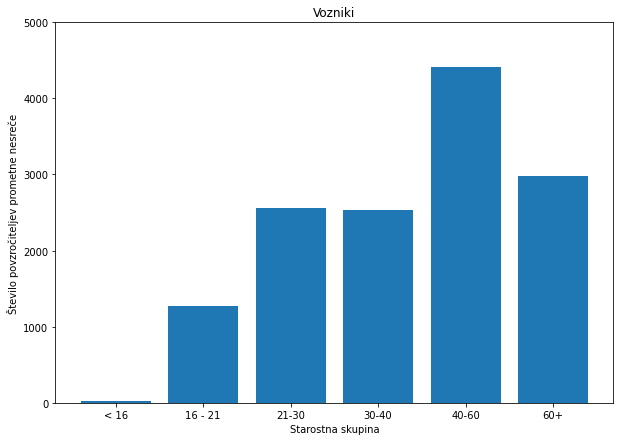

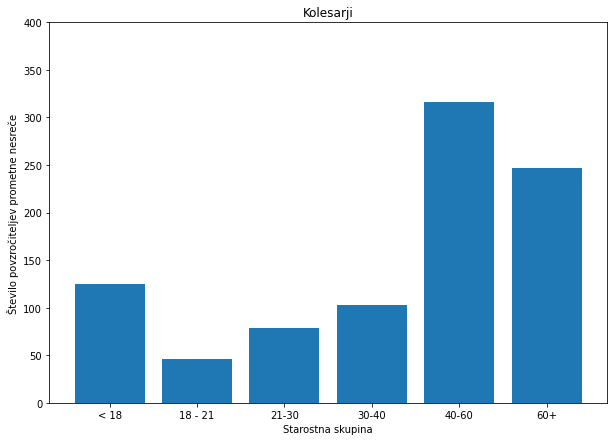

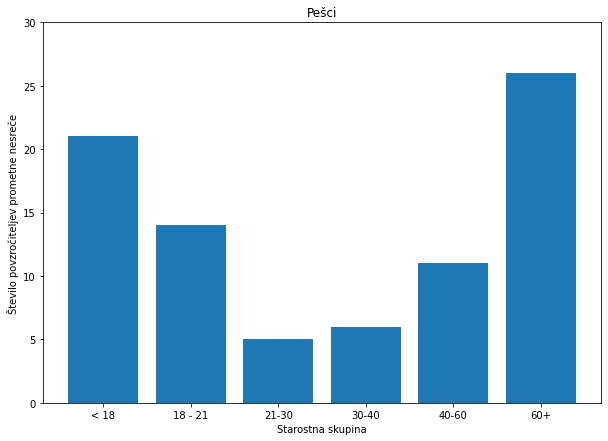

In [3]:
data_2022 = get_data('2022')
people_who_caused = data_2022[data_2022[:,23] == 'POVZROČITELJ']

drivers = people_who_caused[np.isin(people_who_caused[:,29],
        list([
             'VOZNIK AVTOBUSA',
             'VOZNIK KOMBINIRANEGA VOZILA','VOZNIK LAHKEGA MOTORNEGA VOZILA',
             'VOZNIK LAHKEGA ŠTIRIKOLESA','VOZNIK MOPEDA' 'VOZNIK MOPEDA DO 25 KM/H',
             'VOZNIK MOTORNEGA KOLESA','VOZNIK OSEBNEGA AVTOMOBILA',
             'VOZNIK SPECIALNEGA VOZILA','VOZNIK TOVORNEGA VOZILA','VOZNIK TRAKTORJA',
             'VOZNIK TRIKOLESA','VOZNIK ŠTIRIKOLESA'
        ])
)]

bikers = people_who_caused[np.isin(people_who_caused[:,29],list(['KOLESAR', 'VOZNIK KOLESA S POMOŽNIM ELEKTRIČNIM MOTORJEM']))]
pedestrians = people_who_caused[np.isin(people_who_caused[:,29],list(['PEŠEC']))]


# Razdelimo v starostne skupine
# <= 21
# 21-30
# 30-40
# 40-60
# 60+

# vozniki:
ages = drivers[:,24].astype(int)
age_counts = [ 
    len(ages[ages < 16]), 
    len(ages[np.logical_and(ages >= 16, ages <= 21)]), 
    len(ages[np.logical_and(ages > 21, ages <= 30)]),
    len(ages[np.logical_and(ages > 30, ages <= 40)]),
    len(ages[np.logical_and(ages > 40, ages <= 60)]),
    len(ages[ages > 60])
]

fig = plt.figure(figsize =(10, 7))
plt.ylim(0,5000)
plt.bar(['< 16','16 - 21', '21-30', '30-40', '40-60', '60+'], age_counts)
plt.title("Vozniki")
plt.xlabel("Starostna skupina")
plt.ylabel("Število povzročiteljev prometne nesreče")
#plt.savefig("povzrocitelji-vozniki.jpg")
plt.show()

# kolesarji:
ages = bikers[:,24].astype(int)
age_counts = [ 
    len(ages[ages < 18]), 
    len(ages[np.logical_and(ages >= 18, ages <= 21)]), 
    len(ages[np.logical_and(ages > 21, ages <= 30)]),
    len(ages[np.logical_and(ages > 30, ages <= 40)]),
    len(ages[np.logical_and(ages > 40, ages <= 60)]),
    len(ages[ages > 60])
]

fig = plt.figure(figsize =(10, 7))
plt.ylim(0,400)
plt.bar(['< 18','18 - 21', '21-30', '30-40', '40-60', '60+'], age_counts)
plt.title("Kolesarji")
plt.xlabel("Starostna skupina")
plt.ylabel("Število povzročiteljev prometne nesreče")
#plt.savefig("povzrocitelji-kolesarji.jpg")
plt.show()

# pešci:
ages = pedestrians[:,24].astype(int)
age_counts = [ 
    len(ages[np.logical_and(ages > 0, ages < 18)]), 
    len(ages[np.logical_and(ages >= 18, ages <= 21)]), 
    len(ages[np.logical_and(ages > 21, ages <= 30)]),
    len(ages[np.logical_and(ages > 30, ages <= 40)]),
    len(ages[np.logical_and(ages > 40, ages <= 60)]),
    len(ages[ages > 60])
]

fig = plt.figure(figsize =(10, 7))
plt.ylim(0,30)
plt.bar(['< 18','18 - 21', '21-30', '30-40', '40-60', '60+'], age_counts)
plt.title("Pešci")
plt.xlabel("Starostna skupina")
plt.ylabel("Število povzročiteljev prometne nesreče")
#plt.savefig("povzrocitelji-pesci.jpg")
plt.show()

Iz zgornjih analiz je možno opaziti, da so vozniki, ki povzročajo prometne nesreče najpogosteje med štiridesetim in šestdesetim letom starosti ali starejši. Opaziti je možno tudi presenetljivo število mladoletnih voznikov, nekateri so celo mlajši od 16 let in največkrat navedeni kot vozniki lahkih motornih vozil.

Kolesarji, ki z neodgovorno vožnjo povzročijo prometno nesrečo se bolj jasno razdelijo na mladoletne ali starejše. Podobno velja tudi za pešce, kjer je delež pešcev med osemnajstim in enaindvajsetim letom presenetljivo velik.

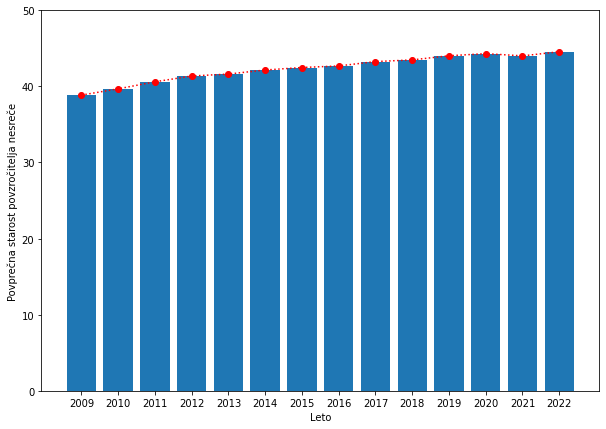

In [4]:
# Povprečna starost voznika, ki povzroči nesrečo čez leta:
years = [ '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022' ]
average_ages = []

for year in years:
    data = get_data(year)
    people_who_caused = data[data[:,23] == 'POVZROČITELJ']

    drivers = people_who_caused[np.isin(people_who_caused[:,29],
            list([
                 'VOZNIK AVTOBUSA',
                 'VOZNIK KOMBINIRANEGA VOZILA','VOZNIK LAHKEGA MOTORNEGA VOZILA',
                 'VOZNIK LAHKEGA ŠTIRIKOLESA','VOZNIK MOPEDA' 'VOZNIK MOPEDA DO 25 KM/H',
                 'VOZNIK MOTORNEGA KOLESA','VOZNIK OSEBNEGA AVTOMOBILA',
                 'VOZNIK SPECIALNEGA VOZILA','VOZNIK TOVORNEGA VOZILA','VOZNIK TRAKTORJA',
                 'VOZNIK TRIKOLESA','VOZNIK ŠTIRIKOLESA'
            ])
    )]

    average_ages.append(np.mean(drivers[:,24].astype(int)))
    
fig = plt.figure(figsize =(10, 7))
plt.ylim(0,50)
plt.bar(years, average_ages)
plt.plot(years, average_ages, 'o:r')
plt.xlabel("Leto")
plt.ylabel("Povprečna starost povzročitelja nesreče")
#plt.savefig("starostpovzrocitelja.jpg")
plt.show()

Na zgornjem grafu lahko vidimo zelo počasno naraščanje povprečne starosti povzročitelja prometne nesreče. To je moč povezati s staranjem populacije Slovenije.

### Spol:

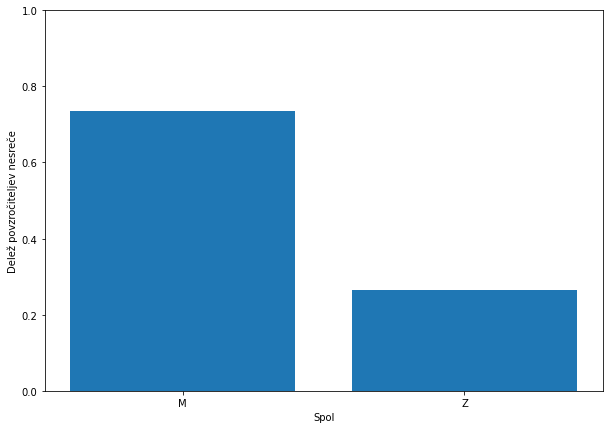

In [5]:
years = [ '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022' ]
genders = ["M","Z"]

mens_measures = []
womens_measures = []

for year in years:
    data = get_data(year)

    people_who_caused = data[data[:,23] == 'POVZROČITELJ']
    drivers = people_who_caused[np.isin(people_who_caused[:,29],
            list([
                 'VOZNIK AVTOBUSA',
                 'VOZNIK KOMBINIRANEGA VOZILA','VOZNIK LAHKEGA MOTORNEGA VOZILA',
                 'VOZNIK LAHKEGA ŠTIRIKOLESA','VOZNIK MOPEDA' 'VOZNIK MOPEDA DO 25 KM/H',
                 'VOZNIK MOTORNEGA KOLESA','VOZNIK OSEBNEGA AVTOMOBILA',
                 'VOZNIK SPECIALNEGA VOZILA','VOZNIK TOVORNEGA VOZILA','VOZNIK TRAKTORJA',
                 'VOZNIK TRIKOLESA','VOZNIK ŠTIRIKOLESA'
            ])
    )]

    men = len(drivers[drivers[:,25] == "MOŠKI"])
    women = len(drivers[drivers[:,25] == "ŽENSKI"])
    a = men + women
    
    mens_measures.append(men/a)
    womens_measures.append(women/a)

    
fig = plt.figure(figsize =(10, 7))
plt.ylim(0,1)
plt.bar(genders, [np.mean(mens_measures), np.mean(womens_measures)])
plt.xlabel("Spol")
plt.ylabel("Delež povzročiteljev nesreče")
#plt.savefig("spolpovzrociteljev.jpg")
plt.show()

Na zgornjem grafu vidimo da je delež moških, ki povzročijo prometno nesrečo v povprečju sedemdeset odstoten.

### Vozniški staž

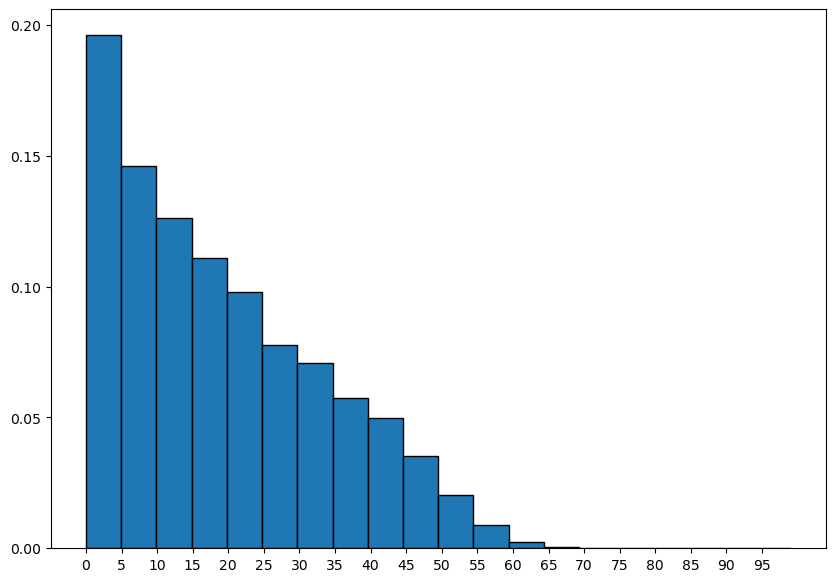

In [13]:
years = [ '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022' ]

a = np.array([])

for year in years:
    data = get_data(year)

    people_who_caused = data[data[:,23] == 'POVZROČITELJ']
    drivers = people_who_caused[np.isin(people_who_caused[:,29],
            list([
                 'VOZNIK AVTOBUSA',
                 'VOZNIK KOMBINIRANEGA VOZILA','VOZNIK LAHKEGA MOTORNEGA VOZILA',
                 'VOZNIK LAHKEGA ŠTIRIKOLESA','VOZNIK MOPEDA' 'VOZNIK MOPEDA DO 25 KM/H',
                 'VOZNIK MOTORNEGA KOLESA','VOZNIK OSEBNEGA AVTOMOBILA',
                 'VOZNIK SPECIALNEGA VOZILA','VOZNIK TOVORNEGA VOZILA','VOZNIK TRAKTORJA',
                 'VOZNIK TRIKOLESA','VOZNIK ŠTIRIKOLESA'
            ])
    )]
    
    a = np.concatenate((a,drivers[np.logical_or(drivers[:,31].astype(int) > 0, drivers[:,32].astype(int) > 0),31].astype(int)))

fig = plt.figure(figsize =(10, 7))
plt.hist(a, bins=20, weights=np.ones(len(a)) / len(a), edgecolor='black')
plt.xticks(np.arange(min(a), max(a)+1, 5))
plt.yticks(np.arange(0,0.25,0.05))
#plt.savefig("vozniskistaz.jpg")
plt.show()

### Uporaba varnostnega pasu

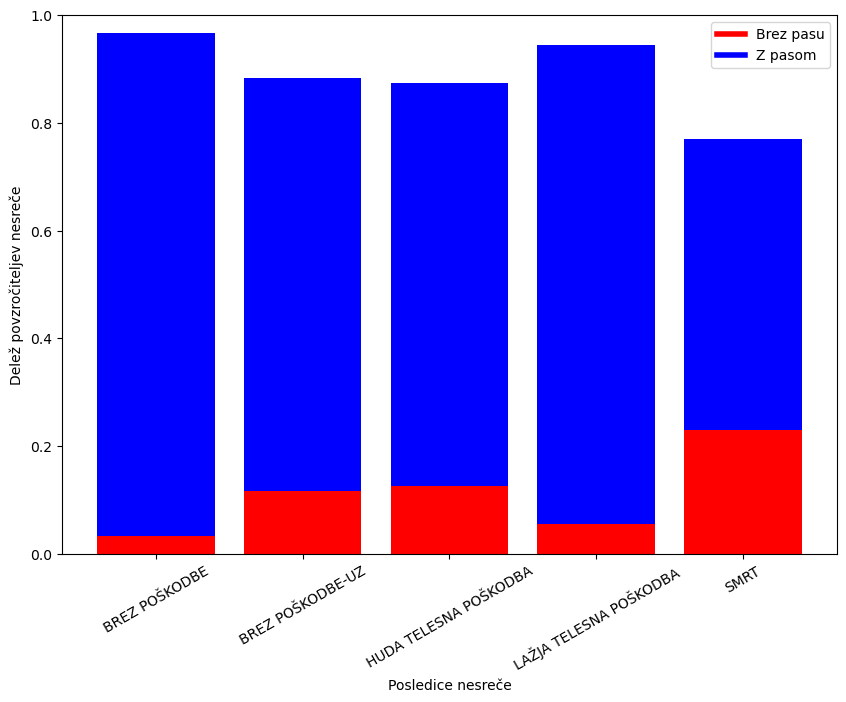

In [42]:
from matplotlib.lines import Line2D

data = get_data('2022')
drivers = data[np.isin(data[:,29],
        list([
             'VOZNIK AVTOBUSA',
             'VOZNIK KOMBINIRANEGA VOZILA','VOZNIK LAHKEGA MOTORNEGA VOZILA',
             'VOZNIK LAHKEGA ŠTIRIKOLESA','VOZNIK MOPEDA' 'VOZNIK MOPEDA DO 25 KM/H',
             'VOZNIK MOTORNEGA KOLESA','VOZNIK OSEBNEGA AVTOMOBILA',
             'VOZNIK SPECIALNEGA VOZILA','VOZNIK TOVORNEGA VOZILA','VOZNIK TRAKTORJA',
             'VOZNIK TRIKOLESA','VOZNIK ŠTIRIKOLESA', 'POTNIK'
        ])
)]

no_empty_injuries = drivers[drivers[:,28] != '',:]
injuries = np.unique(no_empty_injuries[:,28])

didnt_wear_counts = []
wore_counts = []

counts = []
injuries2 = []

for i,injury in enumerate(injuries):
    injured = no_empty_injuries[no_empty_injuries[:,28] == injury,:]
    injured = injured[ injured[:,30] != 'NEZNANO' ]
    
    a = len(injured)
    didnt_wear_seatbelt = len(injured[injured[:,30] == 'NE',:]) / a   
    wore_seatbelt = len(injured[injured[:,30] == 'DA',:]) / a
    
    injuries2.append(injury)
    counts.append(wore_seatbelt)
    
    injuries2.append(injury)
    counts.append(didnt_wear_seatbelt)
 
colors = ['blue', 'red']

fig = plt.figure(figsize =(10, 7))
plt.ylim(0,1)
plt.bar(injuries2, counts, color=colors)
plt.xticks(rotation=30)
plt.xlabel("Posledice nesreče")
plt.ylabel("Delež povzročiteljev nesreče")

custom_lines = [Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

plt.legend(custom_lines, ['Brez pasu', 'Z pasom'])

plt.show()
    

Iz zgornje statistike je razvidno da je delež ljudi, ki so umrli in med vožnjo niso imeli zapetega varnostnega pasu večja kot pri vseh ostalih. Hkrati je delež voznikov ki v nesreči niso utrpeli poškodbe in niso imeli zapetega pasu opazno manjši od deleža zapetih voznikov. Pri ustvarjanju takih ocen je potrebno tudi upoštevati katere vrste nesreč vodijo do kakšnih izidov.